# Clustering

## K-means

`Clustering` method grouping similar data points together. 

Iterative procedure that:
    - starts by guessing initial centroids (centres of clusters)
    - refines guessed by repeatedly assigning examples to their closest centroids
    - recomputres centroids based on assignments

K-means algorythm will `always converge` to some final set of means for centroids.

In order to get optimal solution `algorythm is run a couple of times` with different initializations. The one with `the lowest cost function` will be chosen as final solution.

$$ J = \dfrac{1}{m} \sum_{i=1}^{m} ||x^{i}-\mu_j||^{2} $$

$ \mu $ - cluster centroids coordinates

$ x $ - data points centers

We minimize the square of distance instead of the distance itself due to computational reasons.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
def find_closest_centroids(x,centroids):
    """
    Computes the centroid memberships for every example
    
    Parameters:
    -----------
    x: array
        input values (data points)
    centroids: array
        centroids
    
    Returns:
    --------
    idx: array
        closest centroids
    """
    K=centroids.shape[0]
    idx=np.zeros(x.shape[0])
    
    for index,point in enumerate(x):
        distances=[]
        for c in centroids:
            distance = ((point[0]-c[0])**2+(point[1]-c[1])**2)**0.5
            distances.append(distance)
        idx[index]=distances.index(min(distances))
    
    return idx

In [19]:
def compute_centroids(x,idx,K):
    """
    Returns new centroids by computing means of data points assigned to each centroid
    
    Parameters:
    -----------
    x: array
        data points
    idx: array
        array with index of closest centroid for each data point in x
    K: int
        number of centroids
    
    Returns:
    --------
    centroids: array
        new centroids coordinates
    """
    K=np.unique(idx)
    centroids=[]
    for k in K:
        points=[]
        for index,value in enumerate(idx):
            if value==k:
                points.append(x[index])
                
        points=np.array(points)
        centroid=np.mean(points, axis=0)
        centroids.append(centroid)
    centroids=np.array(centroids)
                
    return centroids

In [36]:
x=np.array([[1,2],[2,3],[3,4],[5,6],[3,8],[1,5],[6,3],[6,2],[4,5],[1,4],[6,4],[5,4],[7,4],[8,3]])
init_centroids=np.array([[2,2],[6,2],[8,5]])

In [37]:
idx=find_closest_centroids(x,init_centroids)
idx

array([0., 0., 0., 2., 2., 0., 1., 1., 0., 0., 1., 1., 2., 2.])

In [39]:
K=3
centroids=compute_centroids(x,idx,K)
centroids

array([[2.        , 3.83333333],
       [5.75      , 3.25      ],
       [5.75      , 5.25      ]])

In [60]:
def run_Kmeans(x,initial_centroids,max_iters=10):
    """
    Runs K-means algorythm on data x
    """
    centroids=initial_centroids
    K=initial_centroids.shape[0]
    idx=np.zeros(x.shape[0])
    
    for i in range(max_iters):
        idx=find_closest_centroids(x,centroids)
        centroids=compute_centroids(x,idx,K)
    return centroids,idx

In [61]:
x=np.array([[1,2],[2,3],[3,4],[5,6],[3,8],[1,5],[6,3],[6,2],[4,5],[1,4],[6,4],[5,4],[7,4],[8,3]])
init_centroids=np.array([[2,2],[6,2],[8,5]])
max_iters=10
centroids,idx=run_Kmeans(x,init_centroids,max_iters)

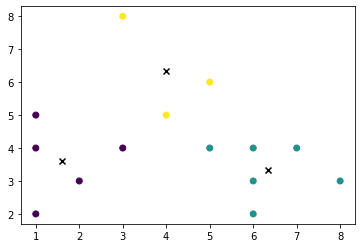

In [62]:
plt.scatter(x[:,0],x[:,1],c=idx)
plt.scatter(centroids[:,0],centroids[:,1],color='k',marker="x")

#### taking random examples from dataset as starting centroids

In [70]:
def kmeans_init_centroids(x,K):
    randix=np.random.permutation(x.shape[0])
    indexes=randix[:K]
    centroids=x[indexes]
    return centroids

In [71]:
K=3
max_iters=10
init_centroids=kmeans_init_centroids(x,K)
centroids,idx=run_Kmeans(x,init_centroids,max_iters)

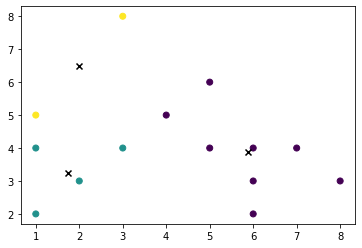

In [72]:
plt.scatter(x[:,0],x[:,1],c=idx)
plt.scatter(centroids[:,0],centroids[:,1],color='k',marker="x")

### image compression

In [85]:
image=plt.imread('data/images.jpg')

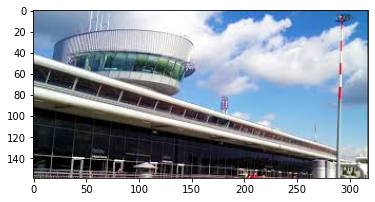

In [88]:
plt.imshow(image)

In [86]:
image.shape

(159, 318, 3)

In [87]:
image=image/255

In [89]:
x_img=np.reshape(image,(image.shape[0]*image.shape[1],3))

In [90]:
x_img

array([[0.4627451 , 0.55294118, 0.68627451],
       [0.4627451 , 0.55294118, 0.68627451],
       [0.4627451 , 0.55294118, 0.68627451],
       ...,
       [0.52156863, 0.5254902 , 0.54117647],
       [0.6745098 , 0.67843137, 0.68627451],
       [0.56078431, 0.56862745, 0.55686275]])

In [91]:
K=16
max_iters=10
init_centroids=kmeans_init_centroids(x_img,K)
centroids,idx=run_Kmeans(x_img,init_centroids,max_iters)

In [93]:
print(f'shape of idx: {idx.shape}')
print(f'closest centroid to first fiv elems: {idx[:5]}')

shape of idx: (50562,)
closest centroid to first fiv elems: [1. 1. 1. 1. 1.]


In [97]:
idx=idx.astype(int)

In [98]:
x_recovered=centroids[idx,:]

In [99]:
x_recovered=np.reshape(x_recovered,image.shape)

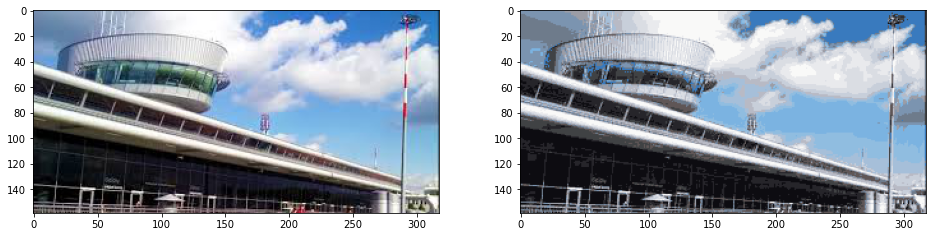

In [106]:
fig,ax=plt.subplots(1,2,figsize=(16,20))
ax[0].imshow(image)
ax[1].imshow(x_recovered)

***

## Anomaly detection

$ \sigma $ - standard deviation

$ \sigma^{2} $ - variance

$ \mu $ - mean

#### maximum likelihood estimates for $\mu$ and $\sigma$

$$ \mu = \dfrac{1}{m} \sum_{i=1}^{m} x_i $$

$$ \sigma^{2} = \dfrac{1}{m} \sum_{i=1}^{m} (x_i - \mu)^{2} $$

$$ p(x) = \dfrac{1}{\sqrt{2*\pi}*\sigma}*e^{\dfrac{-(x_i-\mu)^{2}}{2*\sigma^{2}}} $$

In [8]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x=np.linspace(-1,3,1000)
sigma=0.6
mu=0.5
y=1/((2*np.pi)**0.5*sigma)*np.exp((-(x-mu)**2)/(2*sigma**2))

Text(0.5, 1.0, 'Gaussian distribution')

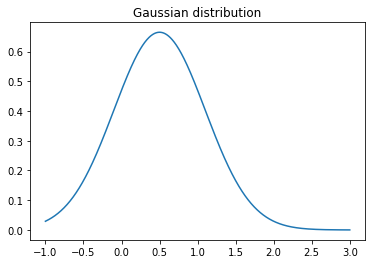

In [19]:
plt.plot(x,y)
plt.title('Gaussian distribution')

Area under the curve is `always equal to 1`. Therefore the smaller sigma, the higher the plot gets.

`supervised learning` - if anomalies tend to be of the same type (similar)

`unsupervised learning` - if anomalies are totally different and don't have any common pattern

if feature doesn't have `gaussian distribution` check in `log(x)` or `log(x+1)` or `square root` of x has a more gaussian-similar distribution `(plt.hist(x))`

***

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#np.save('data/unsup_train.npy', x_train)
#np.save('data/unsup_val.npy', x_val)
#np.save('data/unsup_yval.npy', y_val)
x_train=np.load('data/unsup_train.npy')
x_val=np.load('data/unsup_val.npy')
y_val=np.load('data/unsup_yval.npy')

In [4]:
print(f'train: {x_train.shape}')
print(f'val: {x_val.shape}')
print(f'y_val: {y_val.shape}')

train: (307, 2)
val: (307, 2)
y_val: (307,)


Text(0, 0.5, 'throughput')

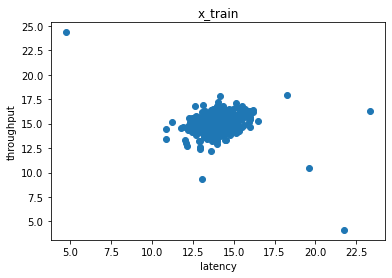

In [20]:
plt.scatter(x_train[:,0],x_train[:,1])
plt.title('x_train')
plt.xlabel('latency')
plt.ylabel('throughput')

In [6]:
def estimate_gaussian(x):
    """
    Calculates mean and variance of all features in dataset
    
    Parameters:
    -----------
    x: array
        dataset
        
    Returns:
    --------
    mu: array 
        mean of all features
    var: array
        variance of all features
    """
    m,n=x.shape
    
    mu=1/m*np.sum(x,axis=0)
    var=1/m*np.sum((x-mu)**2,axis=0)
    
    return mu,var

In [7]:
mu,var=estimate_gaussian(x_train)
print(f'mu: {mu}')
print(f'var: {var}')

mu: [14.11222578 14.99771051]
var: [1.83263141 1.70974533]


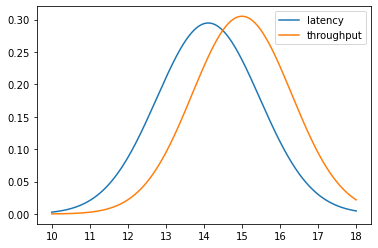

In [36]:
x=np.linspace(10,18,1000)
sigma=(var[0])**0.5
y=1/((2*np.pi)**0.5*sigma)*np.exp((-(x-mu[0])**2)/(2*sigma**2))
plt.plot(x,y,label='latency')
sigma=(var[1])**0.5
y=1/((2*np.pi)**0.5*sigma)*np.exp((-(x-mu[1])**2)/(2*sigma**2))
plt.plot(x,y,label='throughput')
plt.legend()

In [23]:
def estimate(x,mu,var):
    sigma=(var)**0.5
    x=1/((2*np.pi)**0.5*sigma)*np.exp((-(x-mu)**2)/(2*sigma**2))
    x=np.prod(x,axis=1)
    return x

In [27]:
def select_treshold(y_val,p_val):
    """
    Finds the best treshold for selecting outliers based on results from val set and ground truth y_val
    
    Parameters:
    -----------
    y_val: array
        ground truth on val dataset
    p_val: array
        results on val dataset
    
    Returns:
    --------
    epsilon: float
        treshold chosen
    F1: float
        F1 score by choosing epsilon as treshold
    """
    best_epsilon=0
    best_F1=0
    F1=0
    step_size=(max(p_val)-min(p_val))/1000
    
    for epsilon in np.arange(min(p_val),max(p_val),step_size):
        predictions=(p_val<epsilon)
        
        fp=sum((predictions==1)&(y_val==0))
        tp=sum(y_val==1)
        fn=sum((predictions==0)&(y_val==1))
        tn=sum(y_val==0)
        
        precision=tp/(tp+fp)
        recall=tp/(tp+fn)
        
        F1=2*precision*recall/(precision+recall)
        
        if F1>best_F1:
            best_F1=F1
            best_epsilon=epsilon
        
    return best_epsilon, best_F1

In [26]:
p_val=estimate(x_val,mu,var)

In [28]:
epsilon,F1=select_treshold(y_val,p_val)
print(f'epsilon: {epsilon}')
print(f'F1: {F1}')

epsilon: 8.990852778308616e-05
F1: 0.9
